In [1]:
# 주피터 노트북 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

1. 가설 설정
2. 가설 검증을 위한 데이터 수집
3. 데이터 분석

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import os

if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')
    
# 마이너스 폰트 깨짐 방지
plt.rc('axes', unicode_minus=False)

In [4]:
# retina 설정으로 글씨 선명도 높이기
%config inlineBackend.figure_format = "retina"

### 데이터 불러오기

In [5]:
# 데이터 출처: https://www.data.go.kr/data/15007122/fileData.do
# 데이터 파일 용량이 100MB를 초과하여 GitHub에 업로드할 수 없음.

# 인코딩 euc-kr 또는 cp949
df = pd.read_csv('국민건강보험공단_건강검진정보_20191231.csv', encoding='euc-kr')
df.shape

(1000000, 34)

### 데이터 미리보기

In [6]:
df.head()  # tail() sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,...,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [8]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [9]:
df.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

In [10]:
df[df['총 콜레스테롤'].isnull()]

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231
7,2019,8,11,1,12,165,65,85.0,0.7,0.8,...,68.0,1.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,2019,999993,41,1,7,170,65,75.1,1.2,1.2,...,15.0,1.0,1.0,1,0.0,미시행,미시행,미시행,1.0,20191231
999995,2019,999996,41,1,12,170,65,80.0,1.0,1.2,...,21.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999997,2019,999998,45,1,13,160,65,92.3,1.0,0.9,...,84.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999998,2019,999999,30,1,8,170,75,85.0,0.8,0.8,...,29.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231


In [11]:
# notna()는 isnull()의 반대이다.
df.loc[df['총 콜레스테롤'].notna(), '총 콜레스테롤'].describe()

count    333549.000000
mean        196.367727
std          41.311458
min          50.000000
25%         169.000000
50%         195.000000
75%         221.000000
max        2389.000000
Name: 총 콜레스테롤, dtype: float64

In [12]:
# 비음주자의 상당수가 음주여부를 표기하지 않은 듯함
df['음주여부'].value_counts()

1.0    644900
0.0        18
Name: 음주여부, dtype: int64

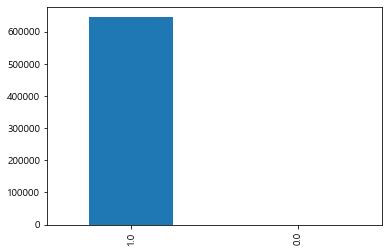

In [13]:
df['음주여부'].value_counts().plot.bar()

In [14]:
df['음주여부'].fillna(0).value_counts()

1.0    644900
0.0    355100
Name: 음주여부, dtype: int64

In [15]:
df['음주여부'].fillna(value=0, inplace=True)
df['음주여부']

0         0.0
1         1.0
2         1.0
3         1.0
4         0.0
         ... 
999995    1.0
999996    1.0
999997    1.0
999998    1.0
999999    0.0
Name: 음주여부, Length: 1000000, dtype: float64

In [16]:
df['음주여부'].isnull().sum()

0

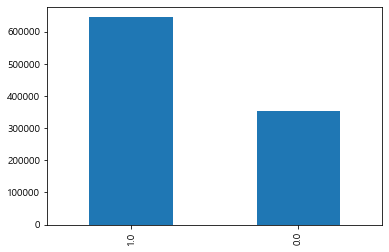

In [17]:
df['음주여부'].value_counts().plot.bar()

In [18]:
df.groupby(['성별코드']).count()

,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,519574,519574,519574,519574,519574,519574,519553,519485,519488,519488,...,517658,519507,519574,519574,225151,519574,519574,519574,225151,519574
2,480426,480426,480426,480426,480426,480426,480044,480320,480324,480331,...,476812,480327,480426,480426,172529,480426,480426,480426,172529,480426


In [19]:
df.groupby(['성별코드']).mean()

,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2019.0,499943.367203,34.143945,10.319872,168.715592,70.791668,85.526902,1.024732,1.025189,1.033706,...,0.976586,28.391920,31.256262,48.280724,1.653023,0.772265,0.433338,0.230108,0.620437,20191231.0
2,2019.0,500062.288321,33.245661,10.687286,155.377561,55.748398,76.768034,0.914779,0.912291,1.032321,...,0.734583,23.885191,20.286610,23.281050,1.063203,0.507156,0.359117,0.183917,0.544569,20191231.0


In [20]:
df.groupby(['성별코드', '흡연상태'])['가입자 일련번호'].count()

성별코드  흡연상태
1     1.0     180257
      2.0     339250
2     1.0     449969
      2.0      30358
Name: 가입자 일련번호, dtype: int64

In [21]:
df.groupby(['성별코드', '흡연상태'])['감마 지티피'].agg(
    ['count', 'mean', 'median', 'max']
)

count       mean  median    max
성별코드 흡연상태                                  
1    1.0   179458  39.628721    27.0  999.0
     2.0   338133  52.872470    35.0  999.0
2    1.0   446653  22.726347    17.0  999.0
     2.0    30061  31.512391    20.0  999.0

In [22]:
df.pivot_table(index='성별코드', values='가입자 일련번호', aggfunc="count")

,가입자 일련번호
성별코드,
1,519574
2,480426


In [23]:
df.pivot_table(index=['성별코드', '흡연상태'], values='가입자 일련번호', aggfunc="count")

가입자 일련번호
성별코드 흡연상태          
1    1.0     180257
     2.0     339250
2    1.0     449969
     2.0      30358

pd.groupby > pivot_table 속도 차이  
하지만 피벗 테이블은 더 직관적이다.  
기능적으로는 비슷하다.

### 전체 데이터 시각화 하기

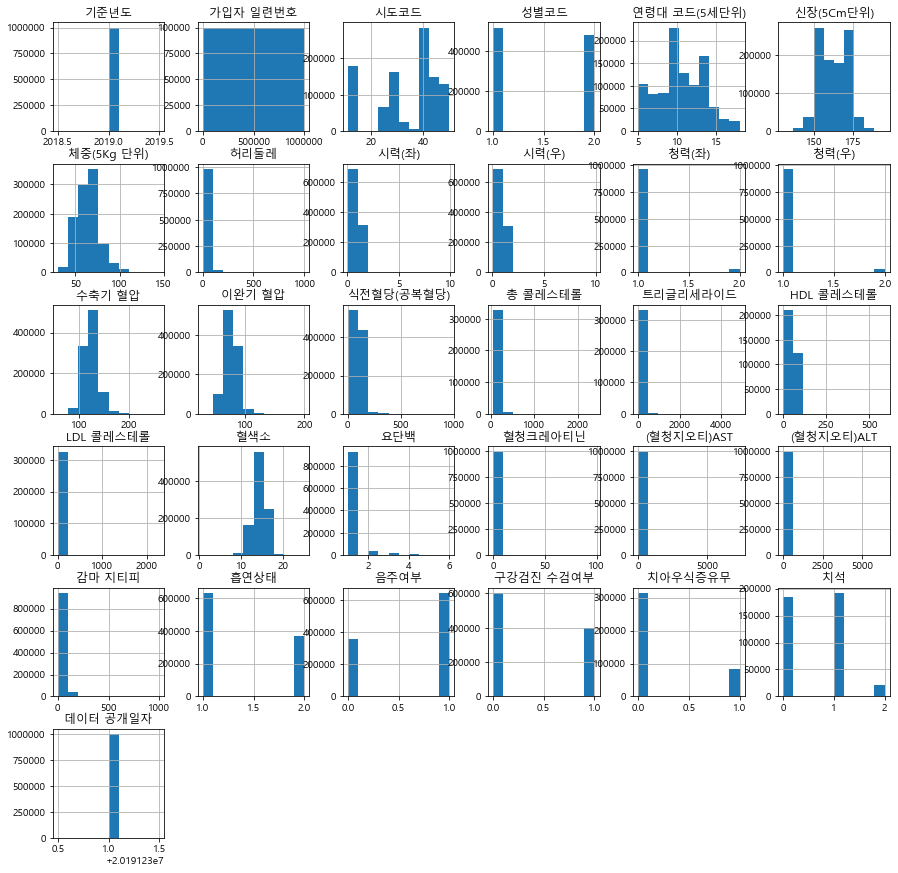

In [24]:
h = df.hist(figsize=(15,15))

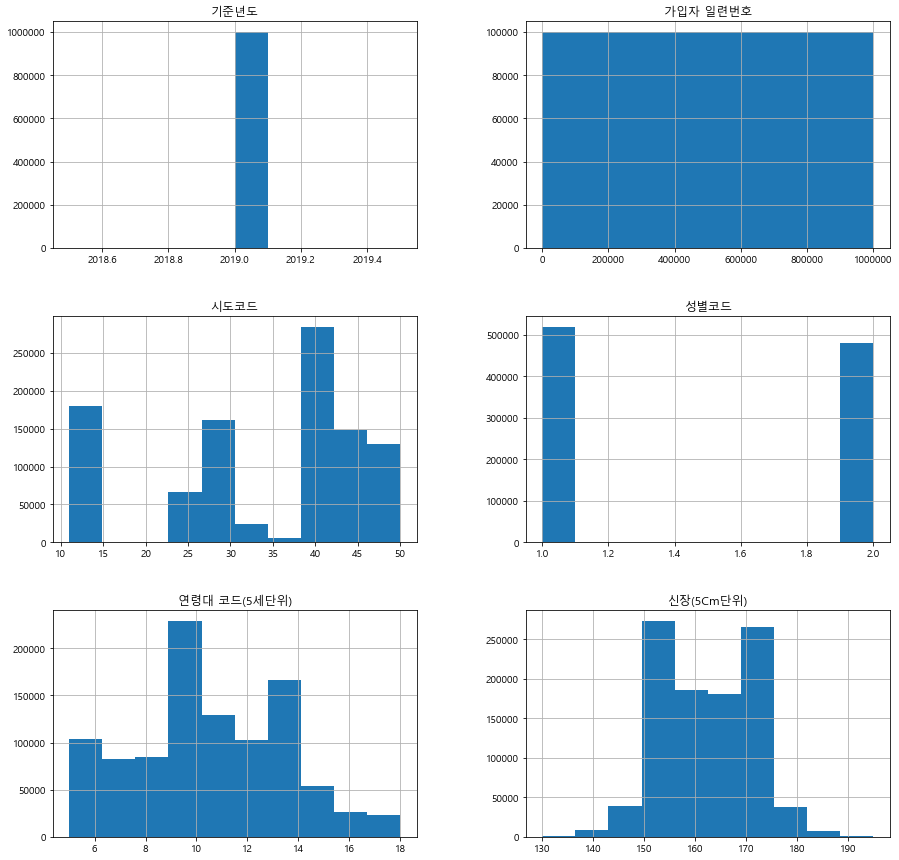

In [25]:
# 신장이 일반적인 정규분포 그래프가 아닌 것처럼 보임
h = df.iloc[:,:6].hist(figsize=(15,15))

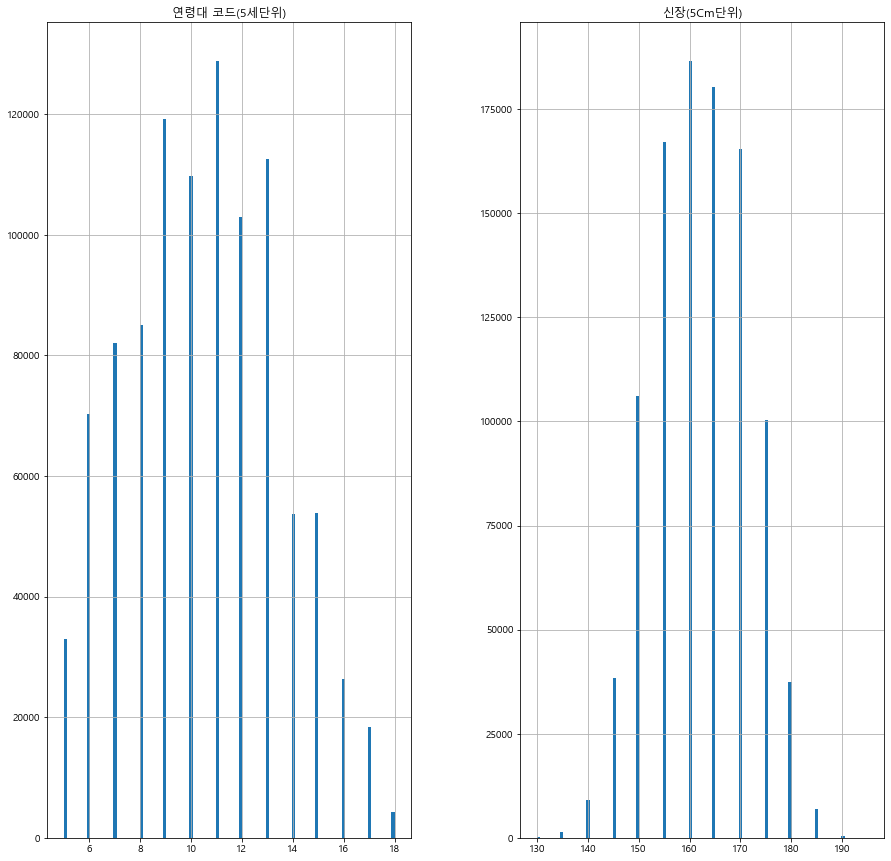

In [26]:
# 100칸으로 나눔
h = df.iloc[:,4:6].hist(figsize=(15,15), bins=100)

### seaborn으로 시각화

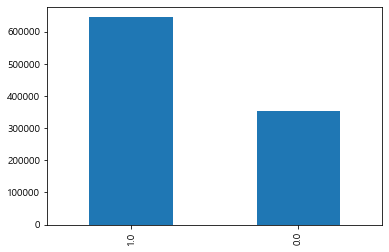

In [27]:
df['음주여부'].value_counts().plot.bar()

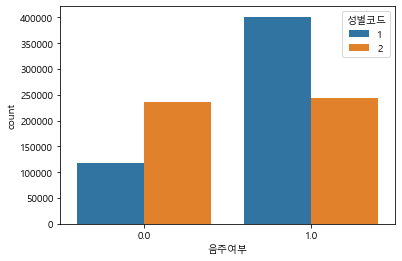

In [28]:
sns.countplot(data=df, x='음주여부', hue='성별코드')

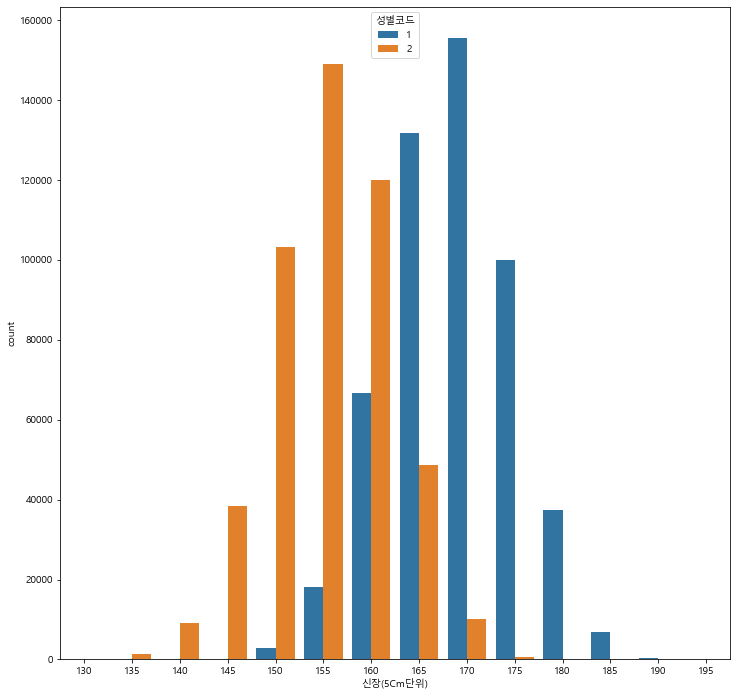

In [29]:
# 여성과 남성의 신장이 모두 그래프에 표기되어서 일반적인 정규분포 그래프를 보이지 않은 것임
plt.figure(figsize=(12, 12))
sns.countplot(data=df, x='신장(5Cm단위)', hue='성별코드')

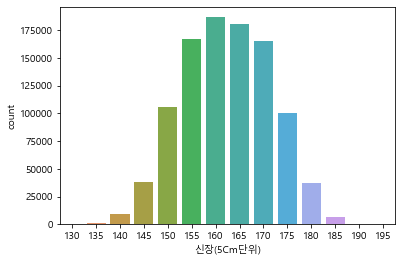

In [30]:
sns.countplot(data=df, x='신장(5Cm단위)')

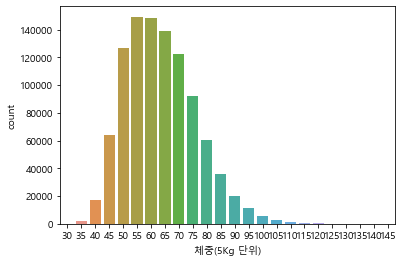

In [31]:
sns.countplot(data=df, x='체중(5Kg 단위)')

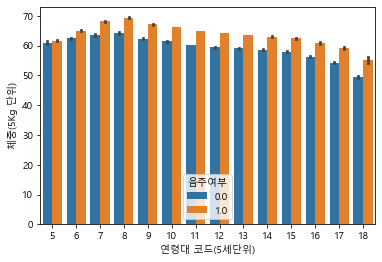

In [32]:
# 신뢰구간을 계산하느라 오래걸린다.
sns.barplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부')

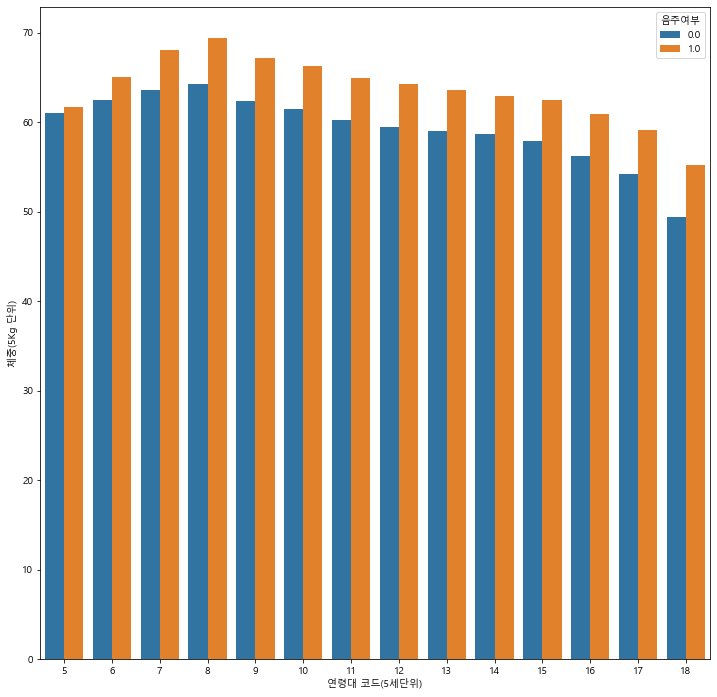

In [33]:
# ci = 신뢰구간이다. 기본값은 95%
plt.figure(figsize=(12,12))
sns.barplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=None)

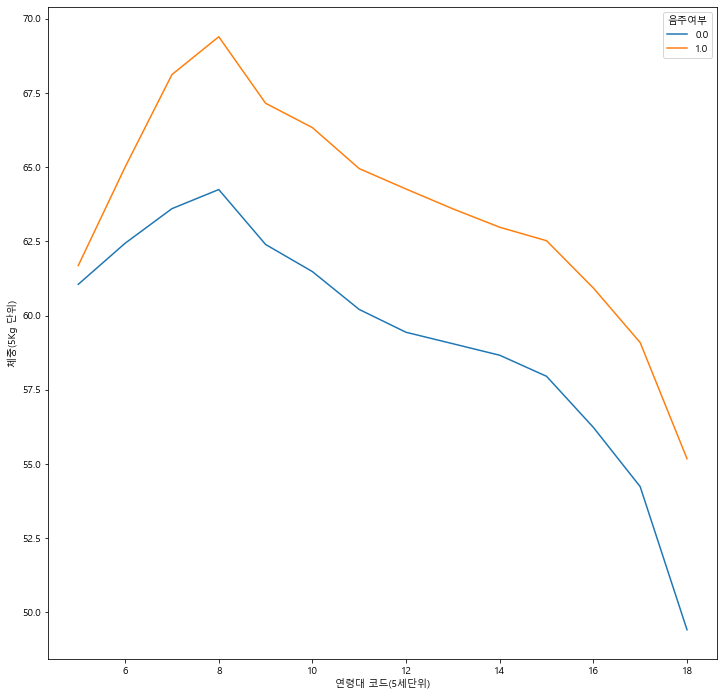

In [34]:
plt.figure(figsize=(12,12))
sns.lineplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=None)

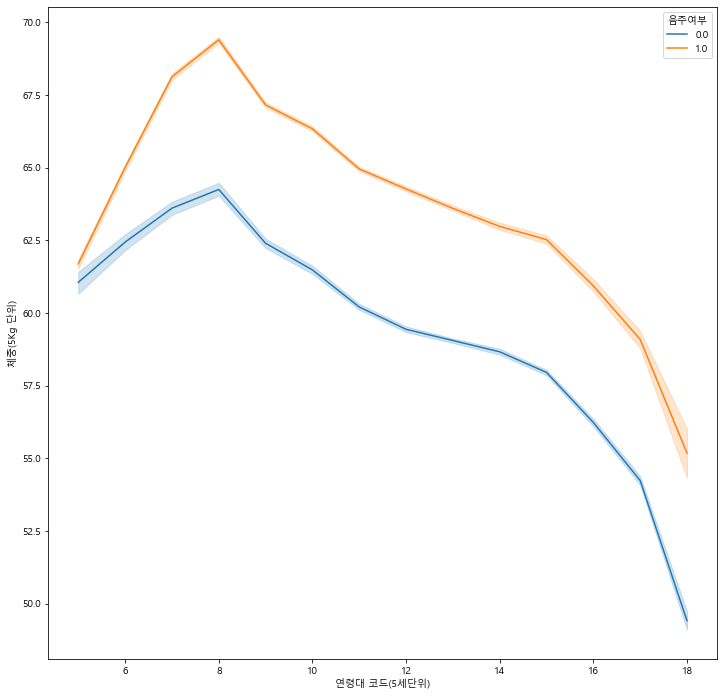

In [35]:
plt.figure(figsize=(12,12))
sns.lineplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부')

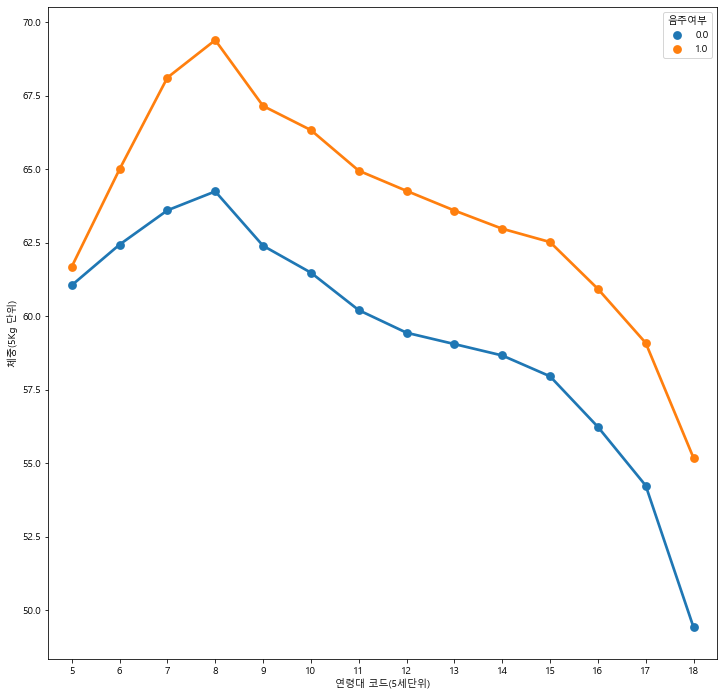

In [36]:
plt.figure(figsize=(12,12))
sns.pointplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=None)

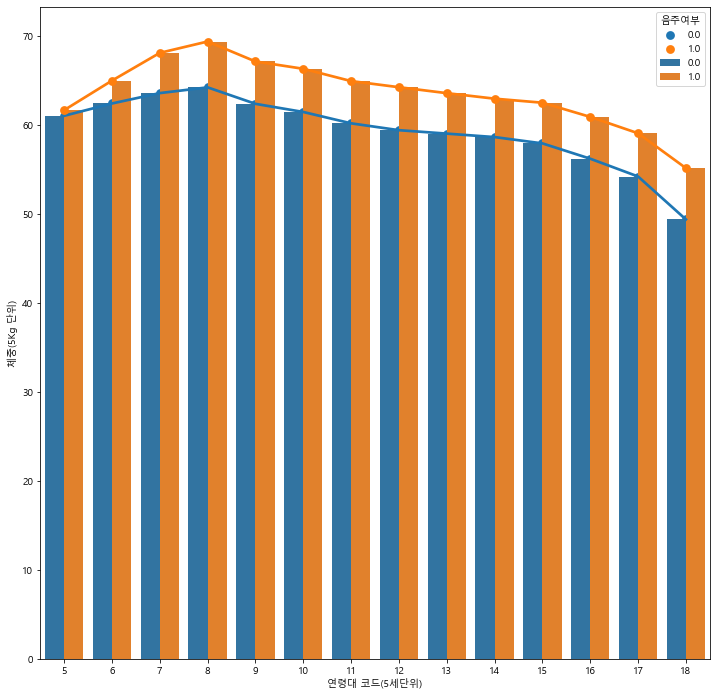

In [37]:
# 축 범위에 따라 차이가 크지 않은 것처럼 보이기도 함. 위에 선 그래프만 있을 때는 차이가 더 크게 보인다.
plt.figure(figsize=(12,12))
sns.barplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=None)
sns.pointplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=None)

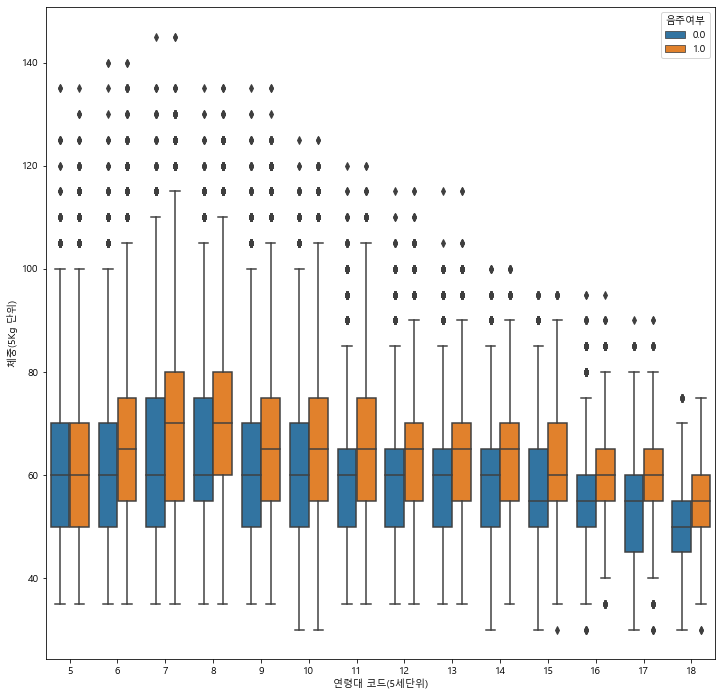

In [38]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부')

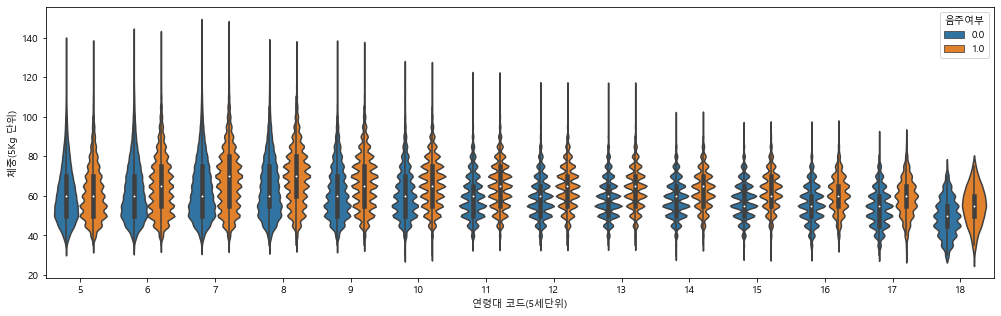

In [39]:
plt.figure(figsize=(17,5))
sns.violinplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부')

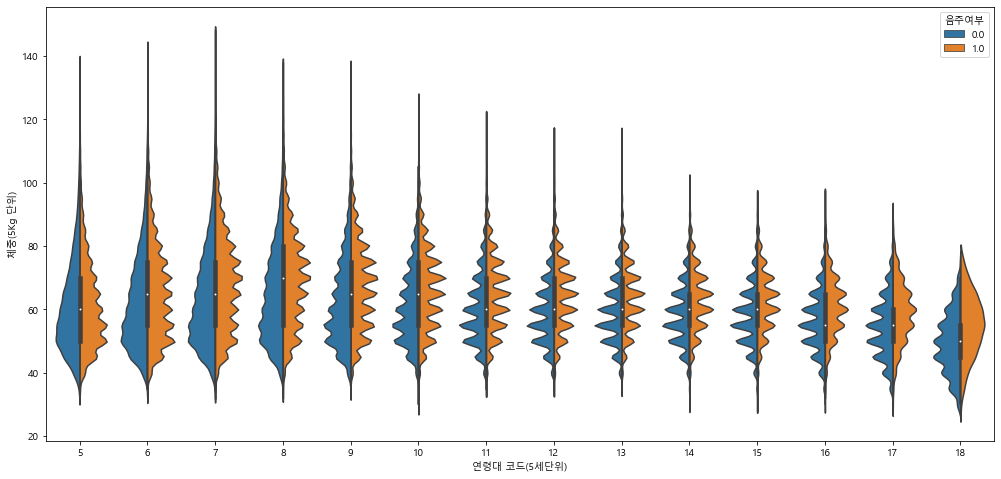

In [40]:
plt.figure(figsize=(17,8))
sns.violinplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', split=True)

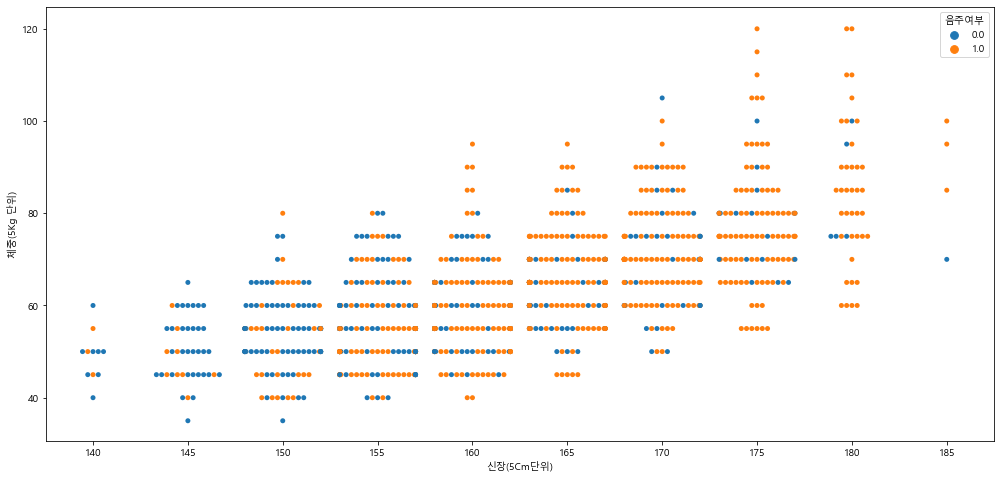

In [41]:
plt.figure(figsize=(17,8))
sns.swarmplot(data=df.sample(1000, random_state=2), x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부')

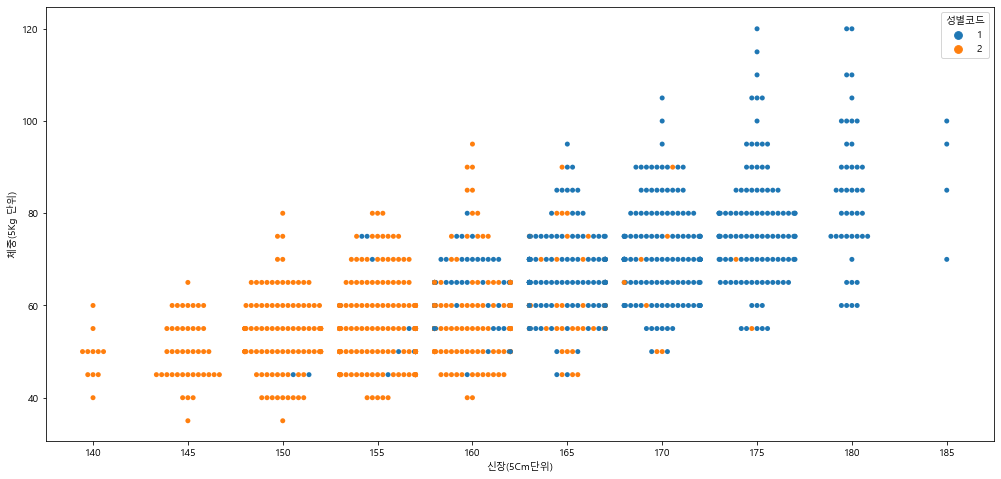

In [42]:
plt.figure(figsize=(17,8))
sns.swarmplot(data=df.sample(1000, random_state=2), x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='성별코드')

여기까지 범주형 데이터 분석 방법이었음. 범주형 데이터가 좀 더 쉽다.  
아래는 수치형 데이터 분석

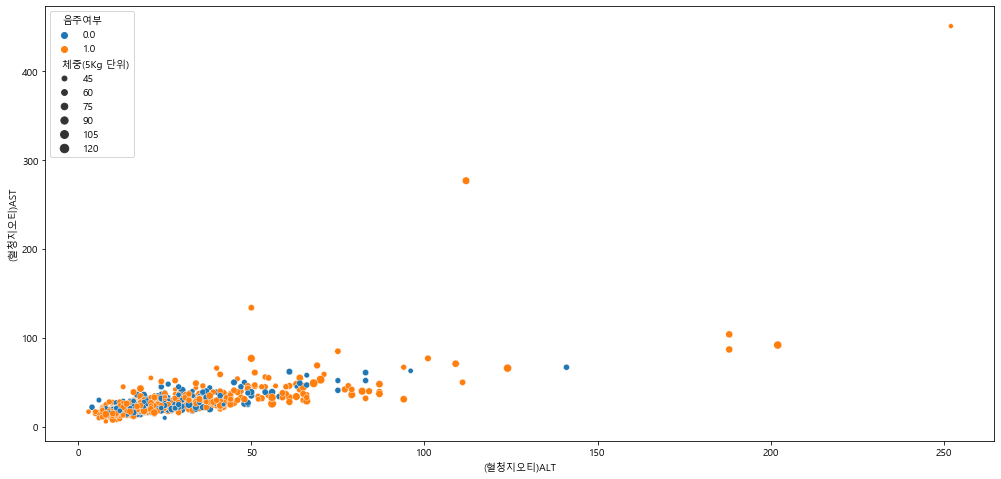

In [43]:
plt.figure(figsize=(17,8))
sns.scatterplot(
    data=df.sample(1000, random_state=2),
    x='(혈청지오티)ALT',
    y='(혈청지오티)AST',
    hue='음주여부',
    size='체중(5Kg 단위)'
)

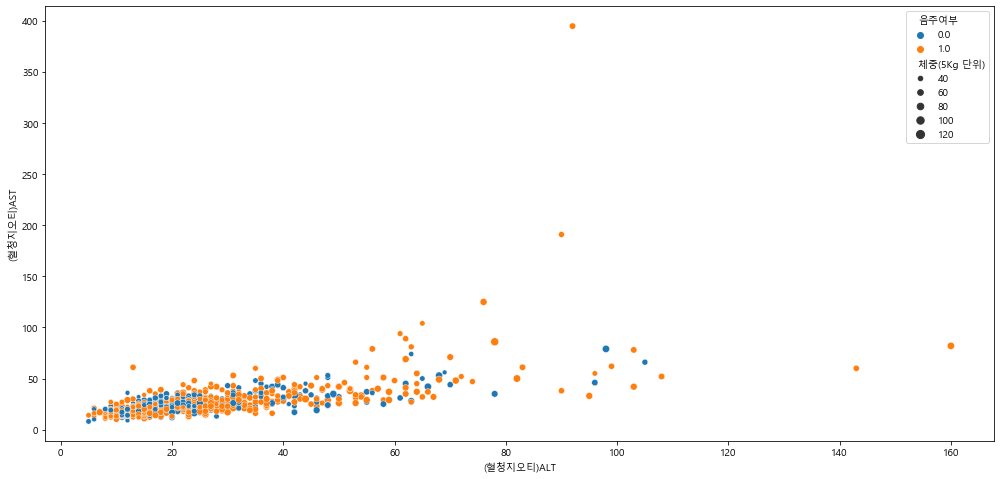

In [44]:
plt.figure(figsize=(17,8))
sns.scatterplot(
    data=df[(df['(혈청지오티)ALT'] < 100) | (df['(혈청지오티)AST'] < 100)].sample(1000),
    x='(혈청지오티)ALT',
    y='(혈청지오티)AST',
    hue='음주여부',
    size='체중(5Kg 단위)'
)

<Figure size 1224x576 with 0 Axes>

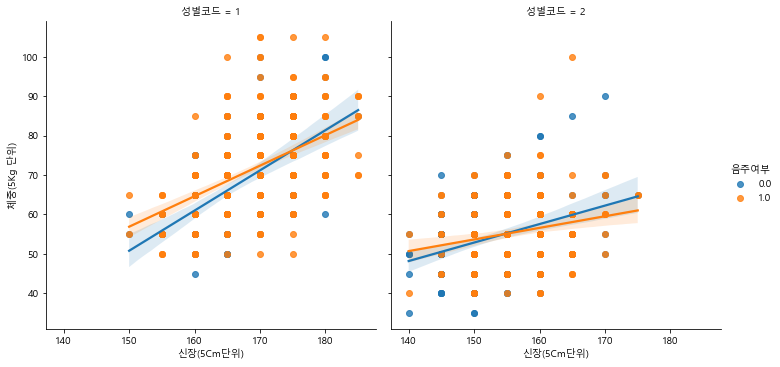

In [45]:
# 선형회귀 선 그래프
plt.figure(figsize=(17,8))
sns.lmplot(
    data=df.sample(1000, random_state=1),
    x='신장(5Cm단위)',
    y='체중(5Kg 단위)',
    hue='음주여부',
    col='성별코드'
)

In [46]:
# 둘 모두 같은 코드이다.
# df_chol = df['총 콜레스테롤'][df['총 콜레스테롤'].notnull() & (df['총 콜레스테롤'] < 400)]
df_chol = df.loc[df['총 콜레스테롤'].notnull() & (df['총 콜레스테롤'] < 400), "총 콜레스테롤"]
df_chol.shape

(333451,)

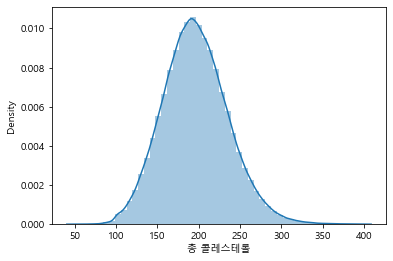

In [47]:
sns.distplot(df_chol, bins=50)

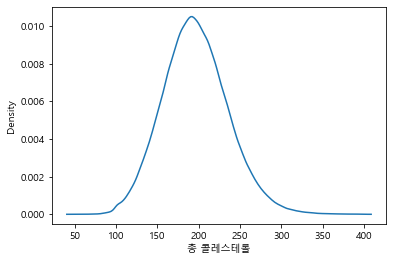

In [48]:
sns.kdeplot(df_chol)

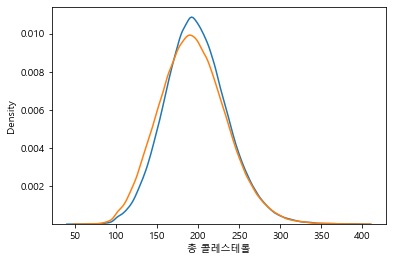

In [49]:
sns.kdeplot(df.loc[df['총 콜레스테롤'].notnull() & (df['총 콜레스테롤'] < 400) & (df['음주여부']==1), "총 콜레스테롤"], label='음주 중')
sns.kdeplot(df.loc[df['총 콜레스테롤'].notnull() & (df['총 콜레스테롤'] < 400) & (df['음주여부']==0), "총 콜레스테롤"], label='음주 안함')

In [50]:
df.loc[:100, ['연령대 코드(5세단위)', '신장(5Cm단위)']]

,연령대 코드(5세단위),신장(5Cm단위)
0,13,165
1,5,155
2,13,160
3,12,170
4,10,170
...,...,...
96,6,165
97,15,150
98,9,170
99,9,160


### 상관관계 분석
https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

In [51]:
cor_columns = ['연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']

In [52]:
df_corr = df[cor_columns].corr()
df_corr

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
연령대 코드(5세단위),1.000000,-0.387673,-0.192033,0.155089,-0.170123,-0.159063,0.215426,0.211307,0.277371,0.105540,...,-0.043953,-0.072428,-0.151511,0.028113,0.031147,0.062737,-0.018532,0.022927,-0.047018,-0.350083
신장(5Cm단위),-0.387673,1.000000,0.668569,0.312287,0.135978,0.132631,-0.089741,-0.091464,0.036034,0.122911,...,-0.171636,-0.002571,0.522102,0.009703,0.173527,0.038068,0.146099,0.164283,0.463880,0.342778
체중(5Kg 단위),-0.192033,0.668569,1.000000,0.745654,0.086449,0.084269,-0.050345,-0.051637,0.254840,0.288263,...,-0.313285,0.026061,0.494448,0.031233,0.154060,0.100967,0.273238,0.226292,0.377806,0.223874
허리둘레,0.155089,0.312287,0.745654,1.000000,0.003168,0.004836,0.039969,0.037656,0.327497,0.289196,...,-0.346164,-0.000651,0.349410,0.045987,0.121318,0.116488,0.246382,0.224787,0.271147,0.051108
시력(좌),-0.170123,0.135978,0.086449,0.003168,1.000000,0.329405,-0.043824,-0.045078,-0.039837,0.002120,...,-0.006931,0.012175,0.082555,-0.007723,0.015216,-0.005009,0.018621,0.013682,0.055871,0.082926
시력(우),-0.159063,0.132631,0.084269,0.004836,0.329405,1.000000,-0.040051,-0.041190,-0.035310,0.004208,...,-0.005726,0.010752,0.083072,-0.011914,0.015277,-0.004747,0.018338,0.014815,0.055876,0.079920
청력(좌),0.215426,-0.089741,-0.050345,0.039969,-0.043824,-0.040051,1.000000,0.550273,0.064584,0.003989,...,-0.033925,-0.032992,-0.039517,0.018409,0.019009,0.010615,-0.011071,0.001285,-0.007931,-0.084517
청력(우),0.211307,-0.091464,-0.051637,0.037656,-0.045078,-0.041190,0.550273,1.000000,0.062405,0.003890,...,-0.032888,-0.033505,-0.041262,0.018727,0.017445,0.010342,-0.010984,0.001957,-0.012060,-0.085105
수축기 혈압,0.277371,0.036034,0.254840,0.327497,-0.039837,-0.035310,0.064584,0.062405,1.000000,0.729443,...,-0.089861,-0.012611,0.170150,0.055790,0.064552,0.079769,0.113250,0.160536,0.106501,-0.035542
이완기 혈압,0.105540,0.122911,0.288263,0.289196,0.002120,0.004208,0.003989,0.003890,0.729443,1.000000,...,-0.070504,0.049244,0.258979,0.041835,0.054998,0.078956,0.132054,0.182456,0.149256,0.059160


In [53]:
# 상관관계 확인
df_corr.loc[df_corr['신장(5Cm단위)']>0.1, '신장(5Cm단위)']

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.668569
허리둘레          0.312287
시력(좌)         0.135978
시력(우)         0.132631
이완기 혈압        0.122911
트리글리세라이드      0.130382
혈색소           0.522102
혈청크레아티닌       0.173527
(혈청지오티)ALT    0.146099
감마 지티피        0.164283
흡연상태          0.463880
음주여부          0.342778
Name: 신장(5Cm단위), dtype: float64

In [54]:
df_corr.loc[df_corr['음주여부']>0.2, '음주여부']

신장(5Cm단위)     0.342778
체중(5Kg 단위)    0.223874
혈색소           0.237035
흡연상태          0.272652
음주여부          1.000000
Name: 음주여부, dtype: float64

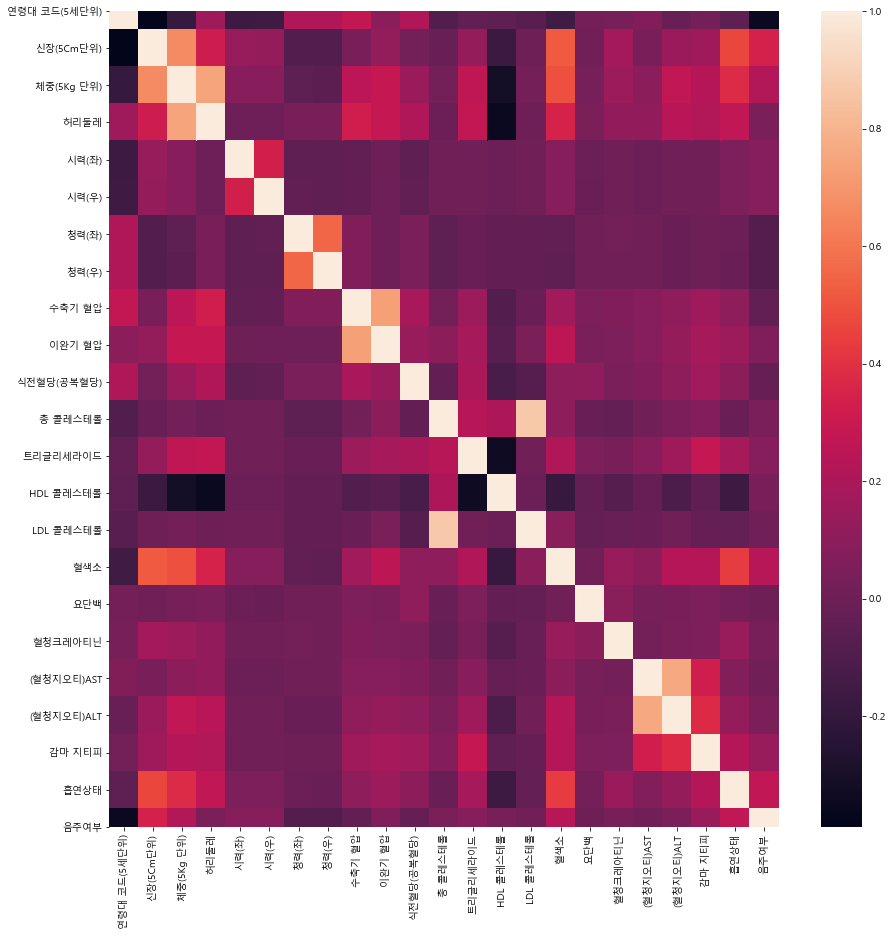

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_corr)

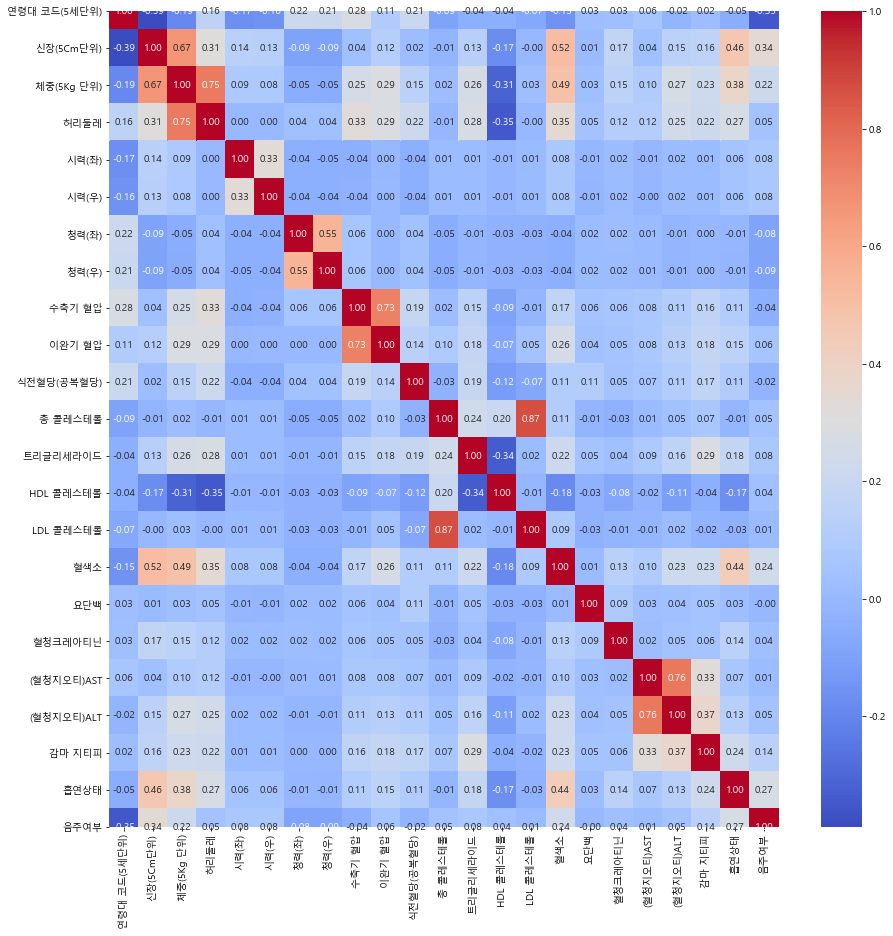

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_corr, annot=True, fmt='0.2f', cmap='coolwarm')

상관관계 => 양적 상관관계를 갖는다. x가 증가할 때 y도 증가한다.  
상관관계 => 음적 상관관계를 갖는다. x가 증가할 때 y가 감소한다.  

x가 2배 증가할 때 y도 2배 증가했다 -> 1이라는 상관관계